# Entrenamiento Local

In [1]:
!pip install tensorflow
!pip install matplotlib
!pip install scikit-learn
!pip install tqdm

In [1]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
def train_and_verify(local_model, local_data, epochs, x_test, y_test, save_name):
    
    history = local_model.fit(local_data[0], local_data[1], epochs=epochs, validation_data=(x_test, y_test))
    y_pred = local_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    local_model.save(save_name)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6038 - loss: 1.1615 - val_accuracy: 0.9519 - val_loss: 0.1566
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9481 - loss: 0.1685 - val_accuracy: 0.9530 - val_loss: 0.1452
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9675 - loss: 0.1025 - val_accuracy: 0.9695 - val_loss: 0.0941
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9797 - loss: 0.0696 - val_accuracy: 0.9728 - val_loss: 0.0842
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9850 - loss: 0.0578 - val_accuracy: 0.9776 - val_loss: 0.0691
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.99      0.98       982

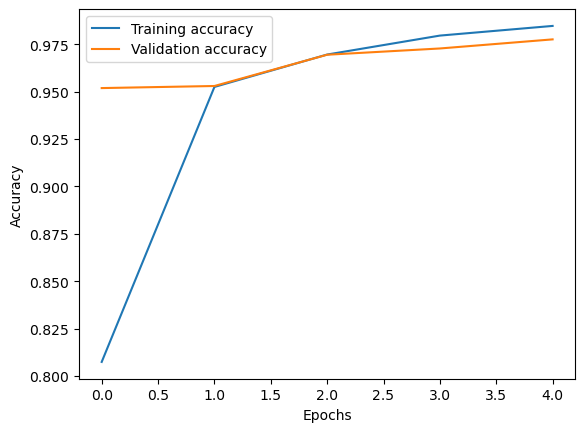

In [4]:
from TheModel import build
import tensorflow as tf

data = np.load('mnist_part_2.npz')
test = np.load('mnist_validation_data.npz')

local_model = build.build_it()
train_and_verify(local_model, [data['x'], data['y']], 5, test['x'], test['y'], "lmodel_2.keras")
